In [1]:
library(tidyverse, quietly = TRUE, warn.conflicts = FALSE)
library(magrittr, quietly = TRUE, warn.conflicts = FALSE)
library(cowplot, quietly = TRUE, warn.conflicts = FALSE)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
map <- read_tsv("../datasets/genesis/genesis.processed.map", 
                col_names = F, col_types = "icii") %>%
        set_colnames(c("chr","id","X","gpos"))

snp2gene <- read_tsv("../datasets/genesis/gene2snp.hg19", col_types = "cc") %>%
    set_colnames(c("id", "gene"))

# SKAT

In [3]:
gs_skat <- read_tsv("../results/gin/gs_skat_aicc/gin_gs.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "skat"))

gm_skat <- read_tsv("../results/gin/gm_skat_aicc/gin_gm.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "skat"))

gi_skat <- read_tsv("../results/gin/gi_skat_aicc/gin_gi.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "skat"))

In [4]:
sum(gs_skat$selected)
sum(gm_skat$selected)
sum(gi_skat$selected)

# all 3 combined
table(gs_skat$selected + gm_skat$selected + gi_skat$selected)

[1] 264

[1] 264

[1] 264


     0      3 
190828    264 

All 3 networks yield the same results. The GM and GI network do not seem to yield better results.

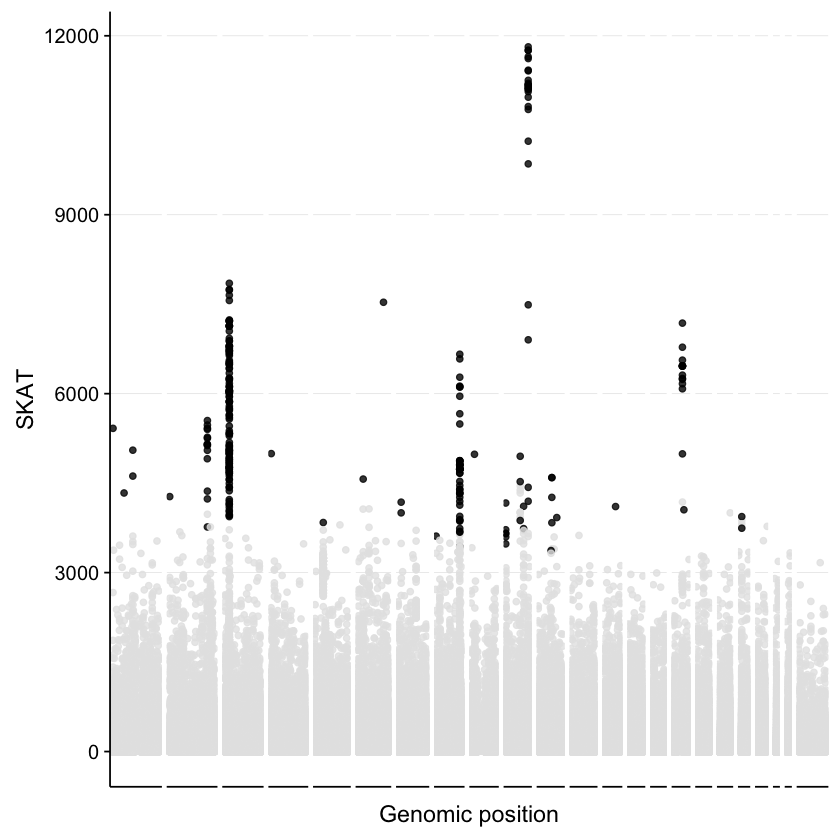

In [5]:
gs_skatp <- gs_skat %>%
    mutate(selected = ifelse(selected == 1, "Yes", "No")) %>%
    ggplot(aes(x = gpos, y = skat, color = selected)) +
        geom_point(alpha = 0.8) +
        background_grid(major = "y", minor = "none") +
        theme(axis.text.x = element_blank(),
              axis.ticks.x=element_blank(),
              legend.position = "none",
              panel.spacing.x = unit(0.2, "lines"),
              strip.background = element_blank(),
              strip.text.x = element_blank()) +
        labs(x = "Genomic position", y = "SKAT") +
        scale_color_manual(values = c(Yes = "black", No = "gray90")) +
        facet_grid(. ~ chr, scales = "free_x", space = "free_x", switch = "x")
gs_skatp

We are indeed selecting the most associated SNPs, and just restricting for sparsity. Let's check the  η and λ values:

In [6]:
system2("head", c("-n2", "../results/gin/gi_skat_aicc/gin_gi.out.txt"), stdout = T)

[1] "#Best Lambda:\t2.0893e-19" "#Best Eta:\t2314.43"

As could be expected, we are disregarding the network, focusing exclusively on association and sparsity.

In [21]:
gs_skat %>%
    filter(selected == 1) %>%
    merge(snp2gene) %>%
    select(chr, gene) %>%
    unique

gs_skat %>%
    filter(selected == 1) %>%
    merge(snp2gene) %>%
    select(chr, gene) %>%
    unique %>%
    nrow

,chr,gene
1,8,CASC21
2,8,CASC8
7,2,ALS2CR12
8,6,HSPA1A
9,10,FGFR2
10,10,ZMIZ1
12,2,CASP8
13,11,CNTN5
14,11,RAB6A
24,3,NEK10


[1] 25

# CHISQ

In [8]:
gs_chi <- read_tsv("../results/gin/gs_chisq_aicc/gin_gs.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "chi2"))

gm_chi <- read_tsv("../results/gin/gm_chisq_aicc/gin_gm.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "chi2"))

gi_chi <- read_tsv("../results/gin/gi_chisq_aicc/gin_gi.out.txt", 
               col_names = F,  comment = "#", col_types = "ciiid") %>%
    set_colnames(c("id", "chr", "gpos", "selected", "chi2"))

In [9]:
sum(gs_chi$selected)
sum(gm_chi$selected)
sum(gi_chi$selected)

# all 3 combined
table(gs_chi$selected + gm_chi$selected + gi_chi$selected)

[1] 388

[1] 2769

[1] 186


     0      1      2      3 
188214   2591    109    178 

In [10]:
system2("head", c("-n2", "../results/gin/gs_chisq_aicc/gin_gs.out.txt"), stdout = T)
system2("head", c("-n2", "../results/gin/gm_chisq_aicc/gin_gm.out.txt"), stdout = T)
system2("head", c("-n2", "../results/gin/gi_chisq_aicc/gin_gi.out.txt"), stdout = T)

[1] "#Best Lambda:\t0.0447065" "#Best Eta:\t9.63172"

[1] "#Best Lambda:\t0.453207" "#Best Eta:\t4.63105"

[1] "#Best Lambda:\t0.0503758" "#Best Eta:\t9.63172"

In [15]:
gs_chip <- gs_chi %>%
    mutate(selected = ifelse(selected == 1, "Yes", "No")) %>%
    ggplot(aes(x = gpos, y = chi2, color = selected)) +
        geom_point(alpha = 0.8) +
        background_grid(major = "y", minor = "none") +
        theme(axis.text.x = element_blank(),
              axis.ticks.x=element_blank(),
              legend.position = "none",
              panel.spacing.x = unit(0.2, "lines"),
              strip.background = element_blank(),
              strip.text.x = element_blank()) +
        labs(x = "Genomic position", y = "CHISQ") +
        scale_color_manual(values = c(Yes = "black", No = "gray90")) +
        # lims(y = c(0, 6)) +
        facet_grid(. ~ chr, scales = "free_x", space = "free_x", switch = "x")

In [16]:
gm_chip <- gm_chi %>%
    mutate(selected = ifelse(selected == 1, "Yes", "No")) %>%
    ggplot(aes(x = gpos, y = chi2, color = selected)) +
        geom_point(alpha = 0.8) +
        background_grid(major = "y", minor = "none") +
        theme(axis.text.x = element_blank(),
              axis.ticks.x=element_blank(),
              legend.position = "none",
              panel.spacing.x = unit(0.2, "lines"),
              strip.background = element_blank(),
              strip.text.x = element_blank()) +
        labs(x = "Genomic position", y = "CHISQ") +
        scale_color_manual(values = c(Yes = "black", No = "gray90")) +
        # lims(y = c(0, 6)) +
        facet_grid(. ~ chr, scales = "free_x", space = "free_x", switch = "x")

In [17]:
gi_chip <- gi_chi %>%
    mutate(selected = ifelse(selected == 1, "Yes", "No")) %>%
    ggplot(aes(x = gpos, y = chi2, color = selected)) +
        geom_point(alpha = 0.8) +
        background_grid(major = "y", minor = "none") +
        theme(axis.text.x = element_blank(),
              axis.ticks.x=element_blank(),
              legend.position = "none",
              panel.spacing.x = unit(0.2, "lines"),
              strip.background = element_blank(),
              strip.text.x = element_blank()) +
        labs(x = "Genomic position", y = "CHISQ") +
        scale_color_manual(values = c(Yes = "black", No = "gray90")) +
        # lims(y = c(0, 6)) +
        facet_grid(. ~ chr, scales = "free_x", space = "free_x", switch = "x")

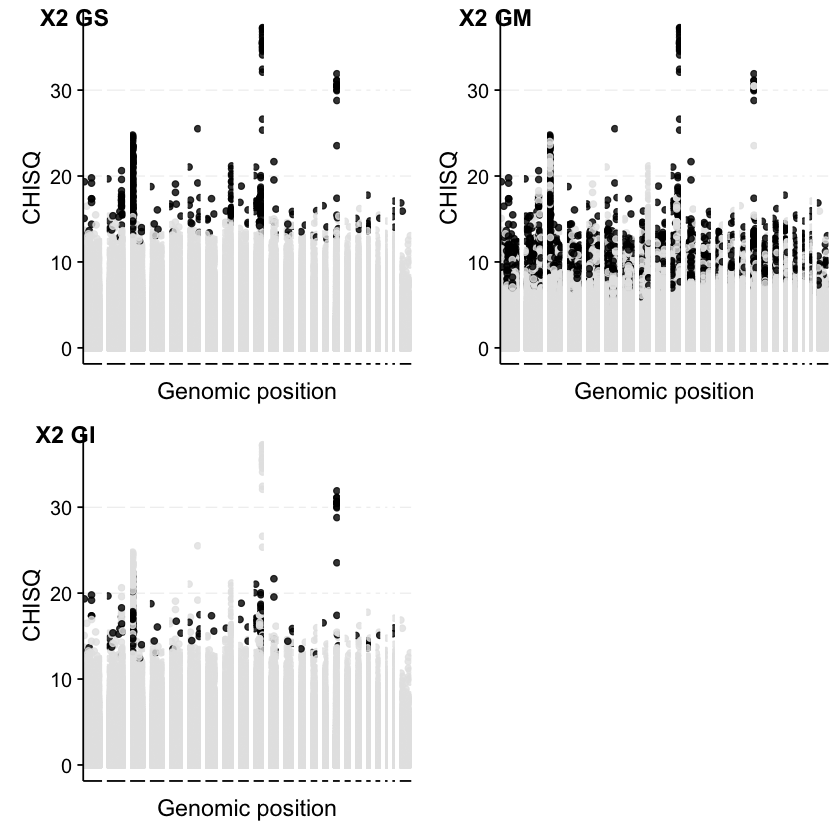

In [18]:
plot_grid(gs_chip, gm_chip, gi_chip, labels=c("X2 GS","X2 GM","X2 GI"))

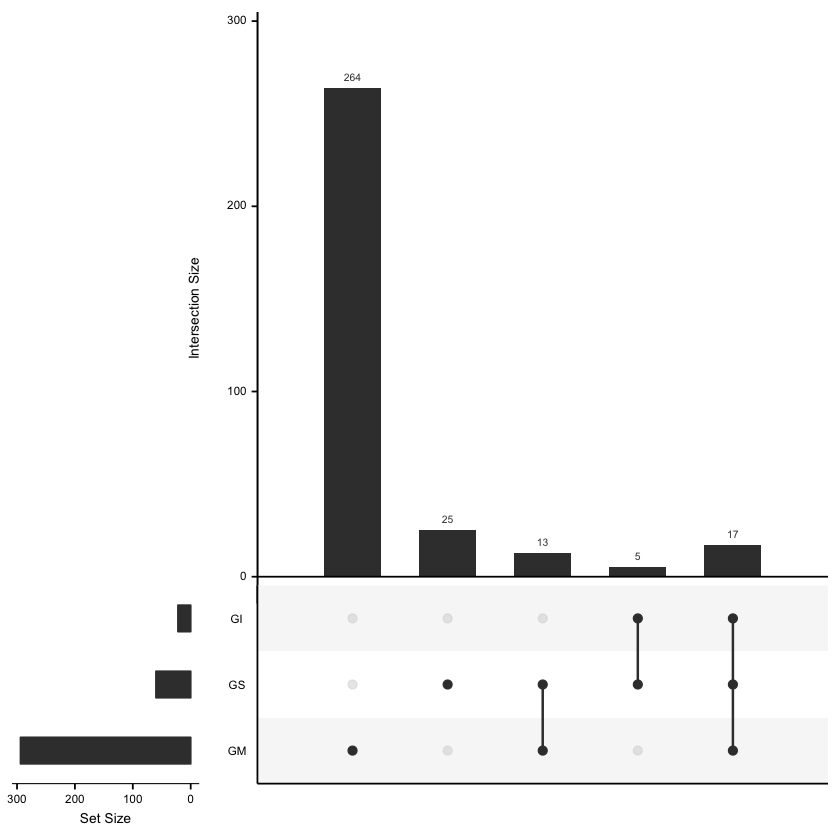

In [30]:
library(UpSetR)

s <- gs_chi %>%
    filter(selected == 1) %>%
    merge(snp2gene) %>%
    select(gene) %>%
    unique %>%
    mutate(GS = 1)

m <- gm_chi %>%
    filter(selected == 1) %>%
    merge(snp2gene) %>%
    select(gene) %>%
    unique %>%
    mutate(GM = 1)

i <- gi_chi %>%
    filter(selected == 1) %>%
    merge(snp2gene) %>%
    select(gene) %>%
    unique %>%
    mutate(GI = 1)

merge(s,m, all = T) %>%
    merge(i, all = T) %>%
    mutate(GS = ifelse(is.na(GS), 0, GS),
           GM = ifelse(is.na(GM), 0, GM),
           GI = ifelse(is.na(GI), 0, GI)) %>%
    upset

In [35]:
# genes present in SKAT results and not in CHISQ
merge(s,m, all = T) %>%
    merge(i, all = T) %>%
    .$gene %>% setdiff(gs_skat %>%
                        filter(selected == 1) %>%
                        merge(snp2gene) %>%
                        .$gene %>%
                        unique, .)

[1] "INADL" "CSMD1"

In [39]:
# number of different SNPs
c(gs_chi %>% filter(selected == 1) %>% .$id,
  gm_chi %>% filter(selected == 1) %>% .$id,
  gi_chi %>% filter(selected == 1) %>% .$id) %>%
    unique %>%
    length

# number of different genes
c(s$gene, m$gene, i$gene) %>% unique %>% length

[1] 2878

[1] 324

# CHI - SKAT comparison

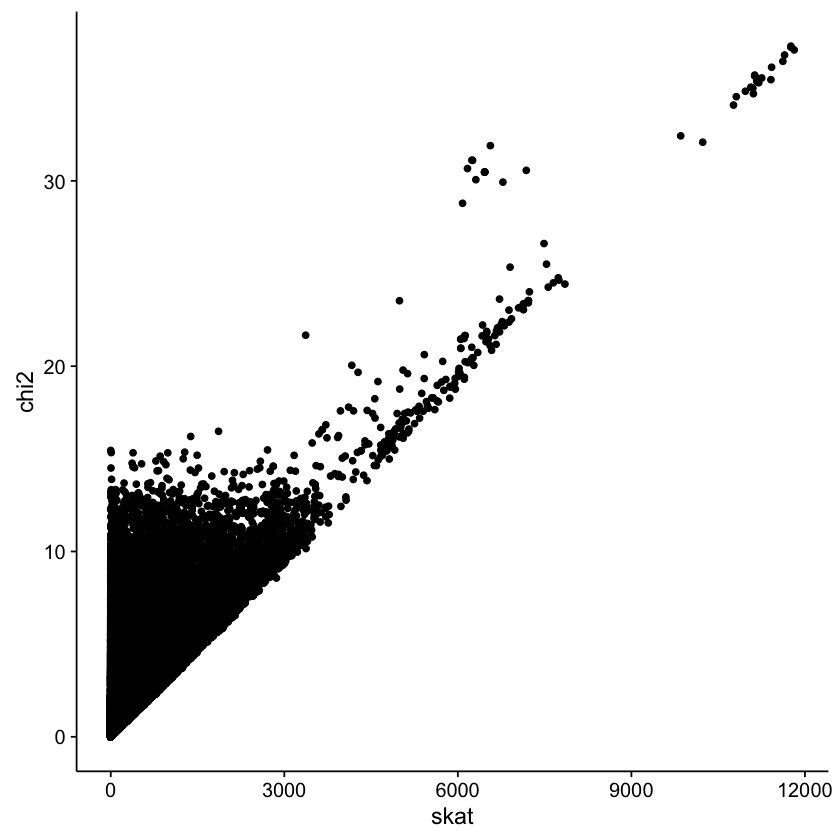

In [19]:
merge(gs_skat, gs_chi) %>%
    ggplot(aes(x = skat, y = chi2)) +
        geom_point()

Why there is this weird shape?